EDA (Exploratory Data Analysis)   EDA_R2.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Cargar datos
path = '/content/drive/MyDrive/Colab Notebooks/PROYECTO KAGGLE/2.2 NLP Tweets/'
train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")

In [ ]:
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


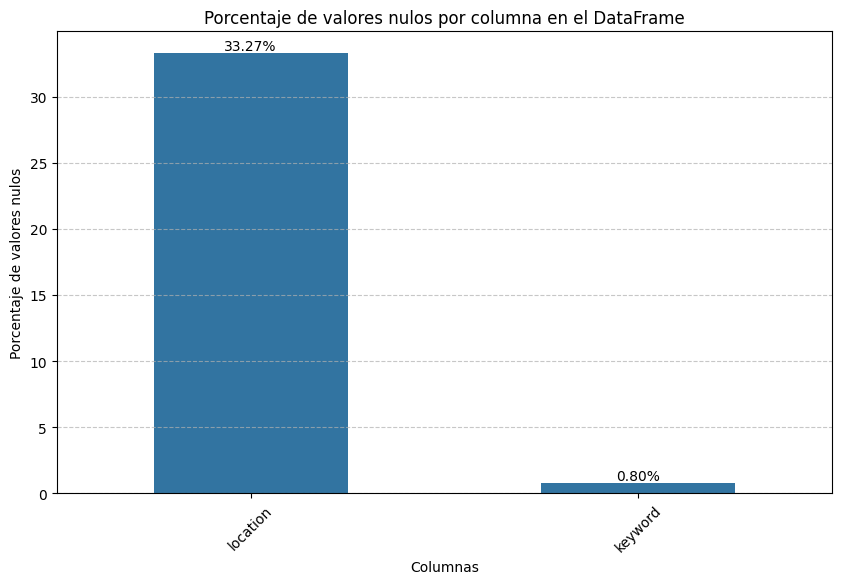

In [ ]:
#grafica de porcentaje de null

df=train_df.isnull().sum()/len(train_df)*100
nulos=df[ df>0 ]
#colocar valores

nulos.sort_values(inplace=True, ascending=False)
#colocar valores en la grafica

# Crear la gráfica
ax = nulos.plot(kind='bar', color="#3274A1", figsize=(10, 6))

# Agregar etiquetas de valores a cada barra
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}%',
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Configurar el título y etiquetas
plt.xlabel("Columnas")
plt.ylabel("Porcentaje de valores nulos")
plt.title("Porcentaje de valores nulos por columna en el DataFrame")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()

In [ ]:
#rellenar con NA
train_df['keyword']=train_df['keyword'].fillna('NA')
train_df['location']=train_df['location'].fillna('NA')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NA,NA,Our Deeds are the Reason of this #earthquake M...,1
1,4,NA,NA,Forest fire near La Ronge Sask. Canada,1
2,5,NA,NA,All residents asked to 'shelter in place' are ...,1
3,6,NA,NA,"13,000 people receive #wildfires evacuation or...",1
4,7,NA,NA,Just got sent this photo from Ruby #Alaska as ...,1


<ipython-input-9-a27998d5373c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Target', y='cantidad', data=df, palette=colors, ax=axes[0])


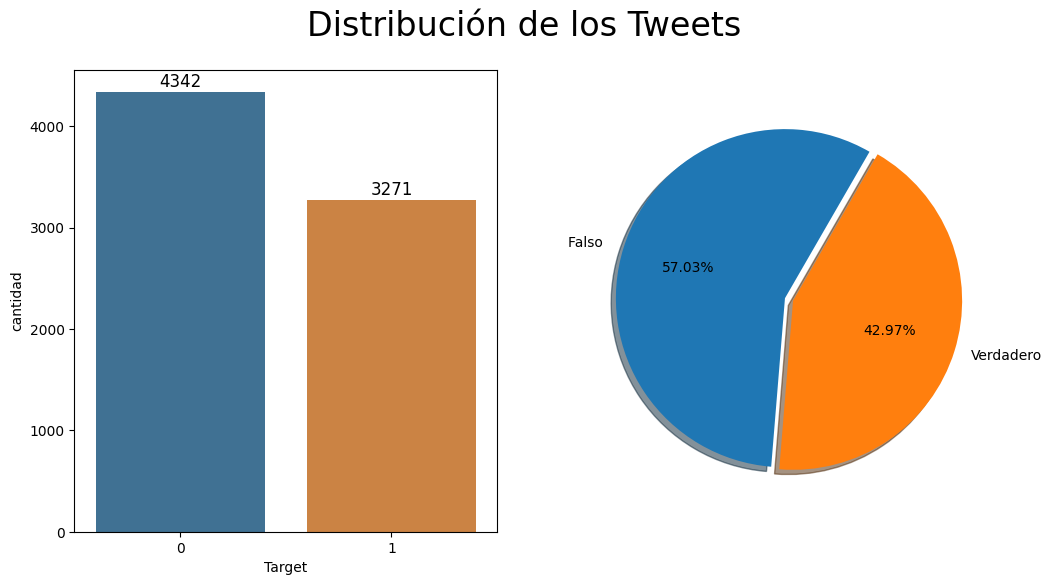

In [ ]:
Real = train_df[ train_df['target'] == 1].shape[0]
Not_Real = train_df[ train_df['target'] == 0 ].shape[0]

data = {'Target': [0, 1], 'cantidad': [Not_Real, Real]}
df = pd.DataFrame(data)
colors = ["#3274A1", "#E1812D"]

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), dpi=100)

sns.barplot(x='Target', y='cantidad', data=df, palette=colors, ax=axes[0])

for i in range(len(data['cantidad'])):
    axes[0].text(i, data['cantidad'][i] + 50, str(data['cantidad'][i]), ha='center', fontsize=12)

axes[1].pie(train_df['target'].value_counts(),
            labels=['Falso ', 'Verdadero'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60
          )

fig.suptitle('Distribución de los Tweets', fontsize=24)
plt.show()


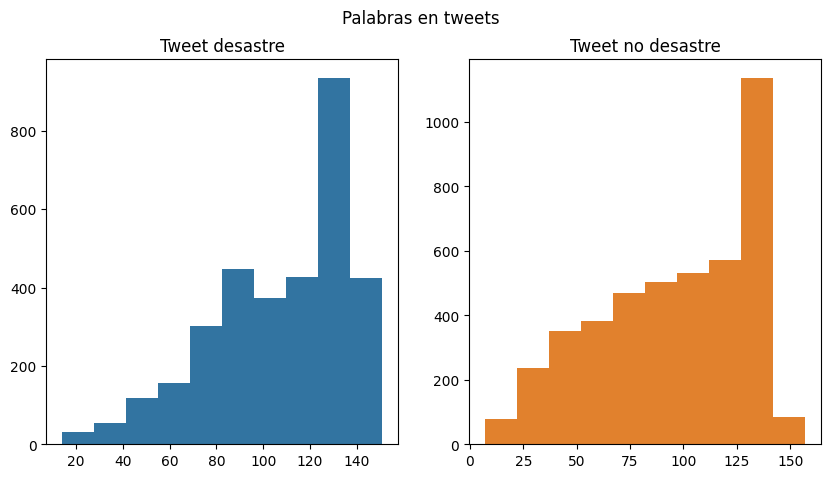

In [ ]:
#colors = ["#", "#"]  # Azul y rojo
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_len=train_df[train_df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='#3274A1')
ax1.set_title('Tweet desastre')

tweet_len=train_df[train_df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='#E1812D')
ax2.set_title('Tweet no desastre')
fig.suptitle('Palabras en tweets')
plt.show()

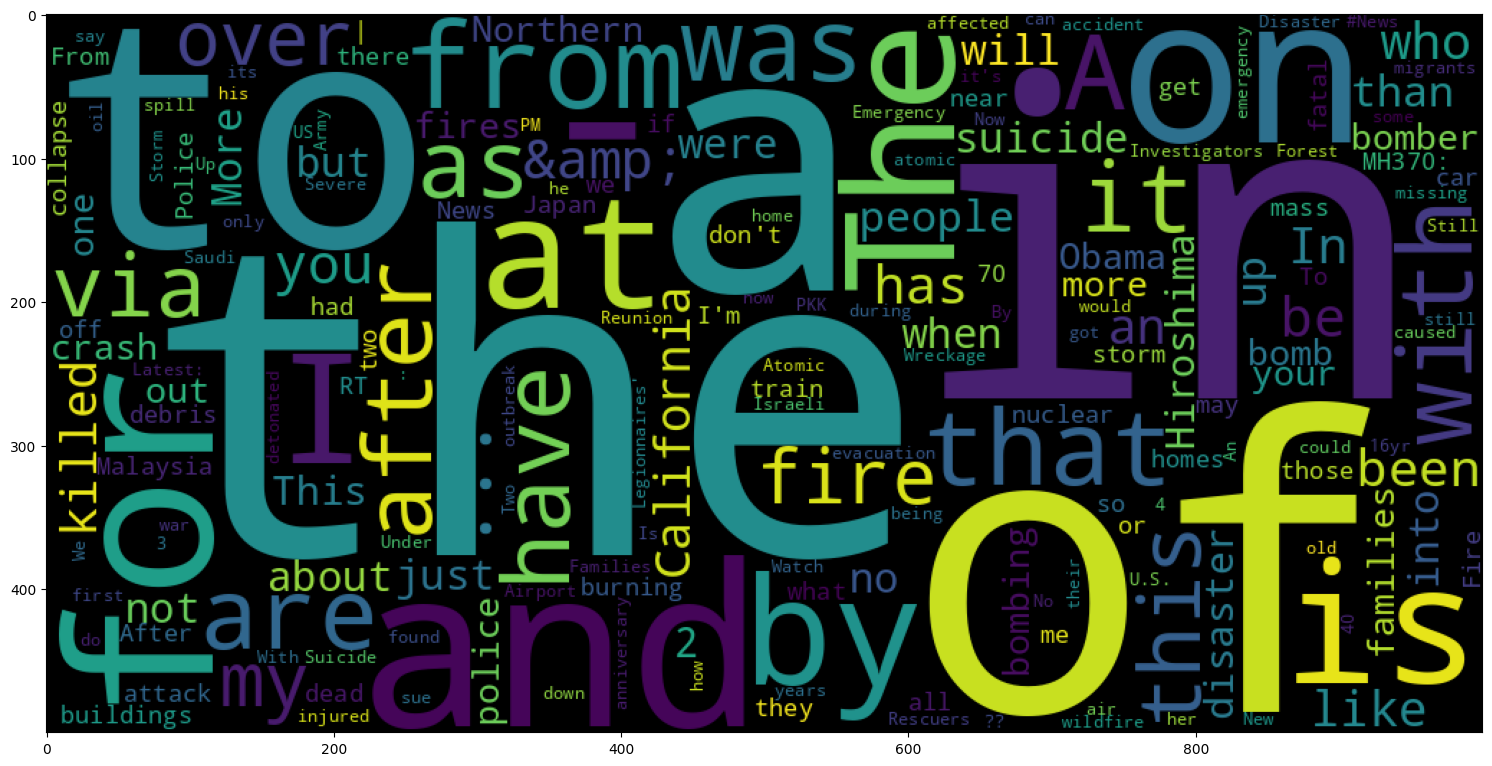

CPU times: user 1.74 s, sys: 58.4 ms, total: 1.8 s
Wall time: 1.94 s


In [ ]:
#crear grafica para saber que palabra se pronuncia mas
%%time


from wordcloud import WordCloud

text=train_df[train_df['target']==1]['text']

dict_of_words = {}
for row in  text: # Iterate directly over the Series elements
    for i in row.split():
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1


#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

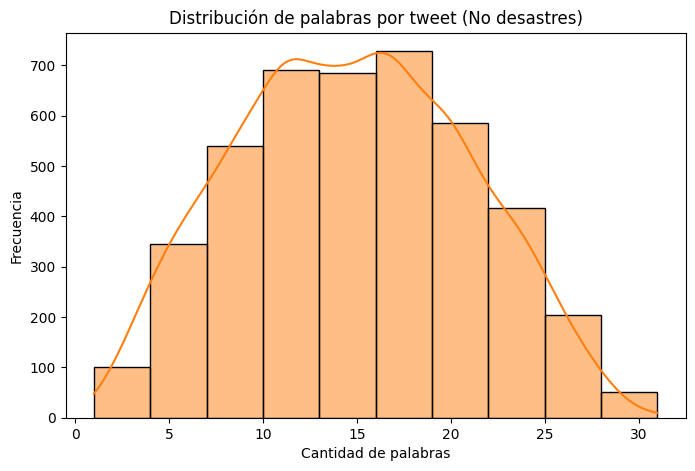

In [ ]:
# Datos de ejemplo: número de palabras en tweets
data=train_df[ train_df['target']==0 ]
word_counts =  data['text'].apply(lambda x: len(str(x).split()))

#[5, 10, 15, 20, 25, 30, 35, 10, 15, 20, 25, 30, 15, 10, 5, 20, 25, 30, 15, 10]

# Crear la figura y el eje
plt.figure(figsize=(8, 5))
sns.histplot(word_counts, kde=True, color="#FF7F0E", bins=10)

# Personalizar la gráfica
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribución de palabras por tweet (No desastres)")

# Mostrar la gráfica
plt.show()

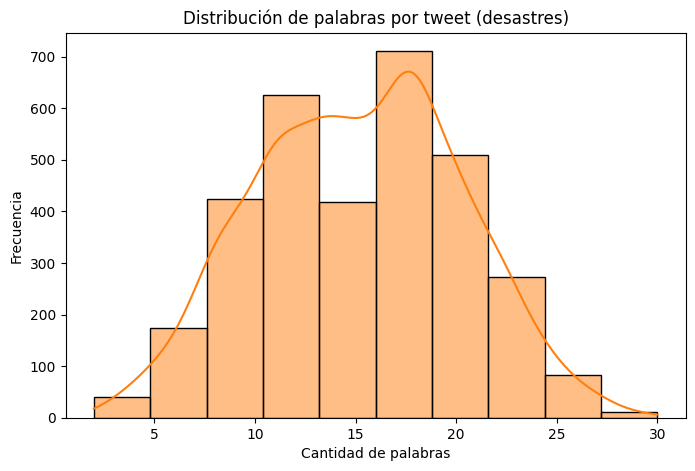

In [ ]:
# Datos de ejemplo: número de palabras en tweets
data=train_df[ train_df['target']==1 ]
word_counts =  data['text'].apply(lambda x: len(str(x).split()))
#[5, 10, 15, 20, 25, 30, 35, 10, 15, 20, 25, 30, 15, 10, 5, 20, 25, 30, 15, 10]

# Crear la figura y el eje
plt.figure(figsize=(8, 5))
sns.histplot(word_counts, kde=True, color="#FF7F0E", bins=10)

# Personalizar la gráfica
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.title("Distribución de palabras por tweet (desastres)")

# Mostrar la gráfica
plt.show()

MODELOS ->  USAR GPU   PROYECTO_R2.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49719 sha256=251dd6d229c66d30d4ab54f10c01439297ebd51014b861c51e2f01458fb9c9e1
  Stored in directory: /root/.cache/pip/wheels/b7/23/31/f9b93f25b95da9b91729c4cd5f35a2b692ab06f688f6759630
Successfully built emoji


In [6]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
import re
from collections import Counter

import matplotlib.pyplot as plt
import time

import seaborn as sns
from sklearn.metrics import confusion_matrix


In [7]:
# Configuración
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
MODELS = [
    "vinai/bertweet-base",
    "cardiffnlp/twitter-roberta-base",
    "microsoft/deberta-v3-small", #microsoft/deberta-v3-large
    "bert-base-uncased",
    "roberta-base"
]
MAX_LEN = 125
BATCH_SIZE = 32
EPOCHS = 3
LEARNING_RATE = 2e-5

# Cargar datos
path = '/content/drive/MyDrive/Colab Notebooks/PROYECTO KAGGLE/2.2 NLP Tweets/'
train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")


cuda


In [17]:
# Preprocesamiento básico

def preprocess_text(text):
    text = text.lower().strip()
    text = " ".join([word for word in text.split() if not word.startswith("@")])

    url_pattern = re.compile(r'http\S+|www.\S+')
    text = url_pattern.sub('', text)

    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    return text

# Dataset y DataLoader
class TweetDataset(Dataset):
    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "targets": torch.tensor(self.targets[idx], dtype=torch.long)
        }


# Entrenamiento
def train_epoch(model, dataloader, optimizer, scheduler, device):
    model.train()
    total_loss = 0

    for batch in dataloader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        targets = batch["targets"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    print(f"Loss: {total_loss / len(dataloader)}")

    #return

# Evaluación
def eval_model(model, dataloader, device):
    model.eval()
    val_loss = 0
    predictions = []
    true_values = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            targets = batch["targets"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=targets)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_values.extend(targets.cpu().numpy())

    f1 = f1_score(true_values, predictions)
    acc = accuracy_score(true_values, predictions)

    print(f"Val Loss: {val_loss / len(dataloader)}")
    print(f"Val F1: {f1}")
    print(f"Val Accuracy: {acc}")


    return predictions , true_values,f1,acc,(val_loss / len(dataloader))

# Predicción en test
def predict(texts, model, tokenizer, max_len, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for text in texts:
            encoding = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=max_len,
                padding="max_length",
                truncation=True,
                return_attention_mask=True,
                return_tensors="pt"
            )

            input_ids = encoding["input_ids"].to(device)
            attention_mask = encoding["attention_mask"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            pred = torch.argmax(logits, dim=1).cpu().numpy()[0]

            predictions.append(pred)

    return predictions



def grafica_confusion(model_name,true_values, predictions):
   cm = confusion_matrix(true_values, predictions)
   plt.figure(figsize=(3, 3))
   sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Desastre", "Desastre"],
            yticklabels=["No Desastre", "Desastre"])
   plt.title("Matriz de Confusión "+model_name, fontsize=10)
   plt.xlabel("Predicciones")
   plt.ylabel("Valores Reales")
   plt.show()


def grafica_metrics(data):
    colors = ["tab:orange", "tab:green", "tab:red"]
    epochs = [1, 2, 3]
    metrics = ["f1", "acc", "loss"]

    for metric in metrics:
      fig, ax = plt.subplots(figsize=(15, 5))
      for i, (model, values) in enumerate(data.items()):
        ax.plot(epochs, values[metric], label=model, color=colors[i], marker='o')

      ax.set_title(f'{metric} por Epoch')
      ax.set_xlabel('Epoch')
      ax.set_ylabel(metric)
      ax.set_xticks(epochs)
      ax.grid(True, linestyle='--', alpha=0.5)

      # Ubicar la leyenda fuera del gráfico, a la derecha
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      plt.tight_layout(rect=[0, 0, 0.75, 1])  # Ajuste para dejar espacio a la derecha
      plt.show()

In [18]:
# Preprocesar datos
train_df["text"] = train_df["text"].apply(preprocess_text)
test_df["text"] = test_df["text"].apply(preprocess_text)

# Dividir datos
train_texts, val_texts, train_targets, val_targets = train_test_split(
    train_df["text"].values,
    train_df["target"].values,
    test_size=0.1,
    random_state=42 #,
    stratify=train_df["target"].values  # Estratificación
)

# DataFrame para almacenar todas las predicciones
#prediction_train = pd.DataFrame()A
#prediction_train["id"] = train_df["id"]

prediction_test = pd.DataFrame()
prediction_test["id"] = test_df["id"]

# Diccionario para almacenar métricas de cada modelo


In [ ]:
model_metrics = {}


# Bucle para entrenar y evaluar cada modelo
for model_name in MODELS:
    print(f"\n{'='*50}")
    print(f"Entrenando modelo: {model_name}")
    print(f"{'='*50}\n")

        # Inicializar componentes del modelo
    tokenizer = AutoTokenizer.from_pretrained(model_name)

        # Crear datasets y dataloaders
    train_dataset = TweetDataset(train_texts, train_targets, tokenizer, MAX_LEN)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True) #, collate_fn=collate_fn

    val_dataset = TweetDataset(val_texts, val_targets, tokenizer, MAX_LEN)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE) #, collate_fn=collate_fn

    total_steps = len(train_loader) * EPOCHS

    start_time = time.time()
    # Cargar modelo
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2).to(DEVICE)

    # Optimizador y scheduler
    optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.01)
    scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=total_steps)
    model_metrics[model_name]={
       "f1": [],
       "acc": [],
       "loss": []
   }
        # Entrenamiento
    for epoch in range(EPOCHS):
            print(f"Epoch {epoch + 1}/{EPOCHS}")
            #train_loss =
            train_epoch(model, train_loader, optimizer, scheduler, DEVICE)

            predictions , true_values , f1,acc,loss = eval_model(model, val_loader, DEVICE) #val_loss, val_f1, val_acc, predict_val , true_val =
            model_metrics[model_name]['f1'].append(f1)
            model_metrics[model_name]['acc'].append(acc)
            model_metrics[model_name]['loss'].append(loss)

    end_time = time.time()

    elapsed_time = end_time - start_time
    print(f"Tiempo de entrenamiento: {elapsed_time:.2f} segundos")

    # Generar predicciones y añadirlas al DataFrame
    model_predictions = predict(test_df["text"].values, model, tokenizer, MAX_LEN, DEVICE)
    prediction_test[model_name] = model_predictions

    # Liberar memoria
    del model
    del tokenizer
    torch.cuda.empty_cache()

    grafica_confusion(model_name,true_values, predictions)
    #print( np.array(true_values) )
    #print( np.array(predictions) )

    #grafica_metrics(model_metrics)

print(model_metrics)



In [21]:
prediction_test.to_csv('prediction_test260525.csv', index=False)

#save prediction_test  cada modelo en un csv
for model_name in MODELS:
    data=prediction_test[['id',model_name]]
    data=data.rename(columns={model_name: 'target'})
    data.to_csv(model_name.replace('/','_')+'.csv', index=False)



In [22]:
# Función para votación mayoritaria
def majority_vote(row):
    votes = [row[model] for model in MODELS if model in row]
    return Counter(votes).most_common(1)[0][0]

In [23]:
#solo las 3 mejores
prediction=prediction_test.drop(columns=['bert-base-uncased', 'roberta-base'])
prediction

,id,vinai/bertweet-base,cardiffnlp/twitter-roberta-base,microsoft/deberta-v3-small
0,0,1,1,1
1,2,1,1,1
2,3,1,1,1
3,9,1,1,1
4,11,1,1,1
...,...,...,...,...
3258,10861,1,1,0
3259,10865,1,1,1
3260,10868,1,1,1
3261,10874,1,1,1


In [24]:
result_test = prediction.apply(majority_vote, axis=1)

# Generar submission
submission = pd.DataFrame({
    "id": test_df["id"],
    "target": result_test
})
submission.to_csv("ensemble_tweet_predictions.csv", index=False)

**GRAFICAS DE LAS PREDICCIONES

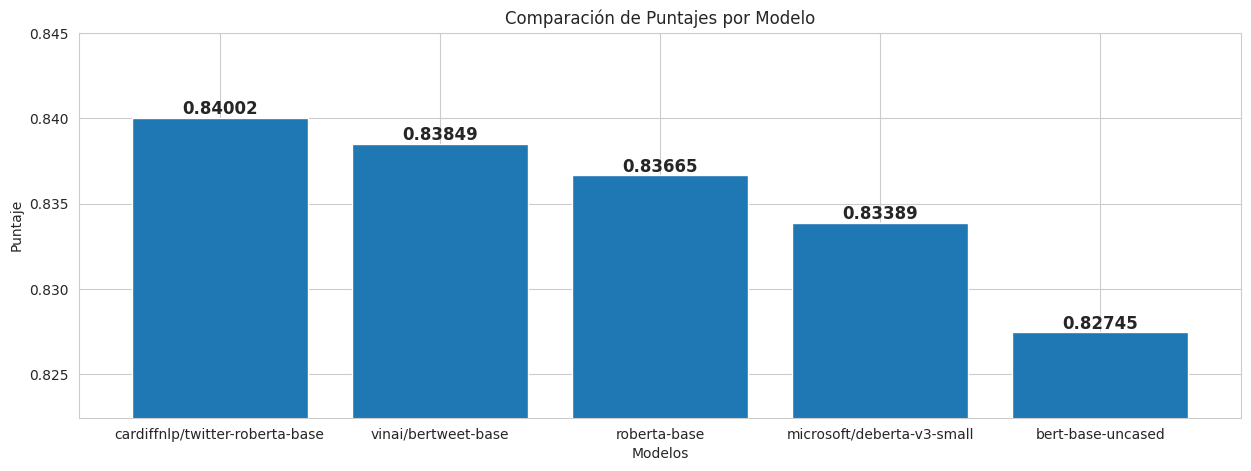

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo
categorias = [
    "cardiffnlp/twitter-roberta-base",
    "vinai/bertweet-base",
    "roberta-base",
    "microsoft/deberta-v3-small",#microsoft/deberta-v3-large
    "bert-base-uncased"
]

#categorias = ['Modelo A', 'Modelo B', 'Modelo C', 'Modelo D', 'Modelo E']
puntajes = [0.84002,0.83849, 0.83665, 0.83389,  0.82745]

# Estilo de Seaborn
sns.set_style("whitegrid")

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(15, 5))

# Crear la gráfica de barras con colores contrastantes
#colores = ['blue', 'green', 'red', 'purple', 'orange']
barras = ax.bar(categorias, puntajes) #, color=colores

# Añadir etiquetas de valores sobre las barras
for bar in barras:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ajustar la escala del eje Y para mejor visualización
ax.set_ylim(min(puntajes) - 0.005, max(puntajes) + 0.005)

# Añadir etiquetas y título
ax.set_xlabel("Modelos")
ax.set_ylabel("Puntaje")
ax.set_title("Comparación de Puntajes por Modelo")

# Mostrar la gráfica
plt.show()


In [27]:
model_metrics

{'vinai/bertweet-base': {'f1': [0.8229508196721311,
   0.8272583201267829,
   0.8214849921011058],
  'acc': [0.8582677165354331, 0.8569553805774278, 0.8517060367454068],
  'loss': [0.36469166725873947, 0.3722794568166137, 0.37924205232411623]},
 'cardiffnlp/twitter-roberta-base': {'f1': [0.7987220447284346,
   0.8135593220338984,
   0.8099688473520249],
  'acc': [0.8346456692913385, 0.8412073490813649, 0.8398950131233596],
  'loss': [0.3802221578856309, 0.4035779610276222, 0.4123169456919034]},
 'microsoft/deberta-v3-small': {'f1': [0.8118811881188119,
   0.8325358851674641,
   0.8270440251572327],
  'acc': [0.8503937007874016, 0.8622047244094488, 0.8556430446194225],
  'loss': [0.3829759315898021, 0.3761684925605853, 0.3926415766278903]},
 'bert-base-uncased': {'f1': [0.8188976377952756,
   0.8029850746268656,
   0.8093023255813954],
  'acc': [0.8490813648293963, 0.8267716535433071, 0.8385826771653543],
  'loss': [0.3746116900195678, 0.4237358408669631, 0.4147021422783534]},
 'roberta

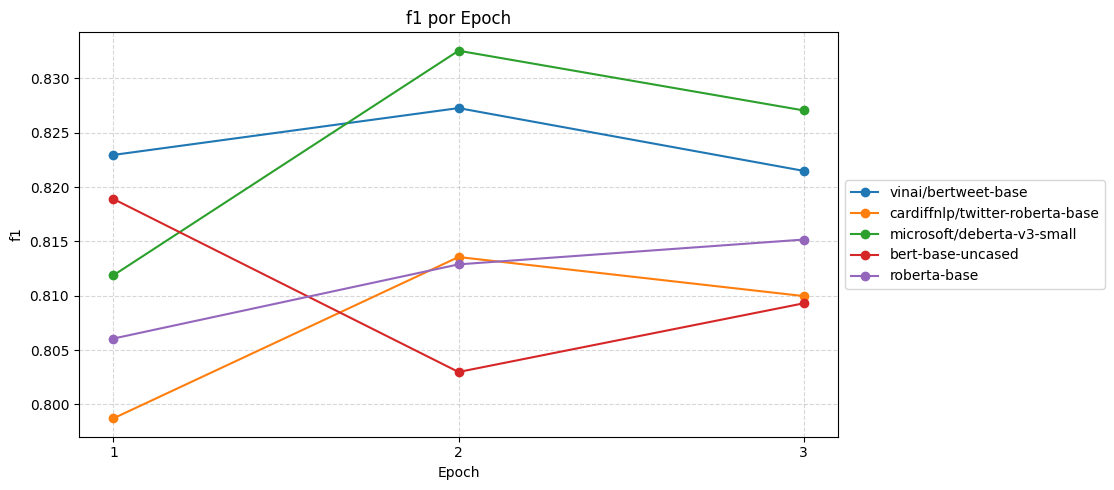

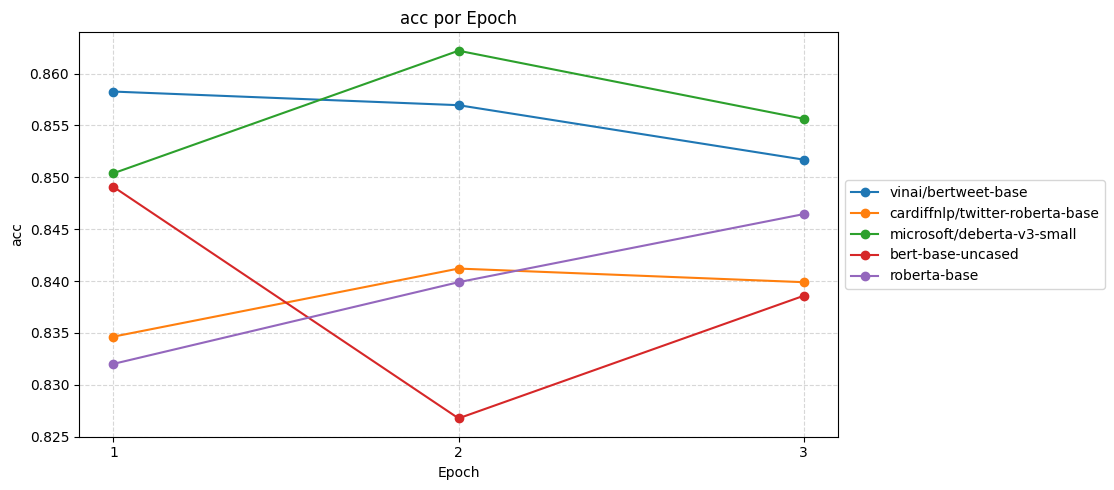

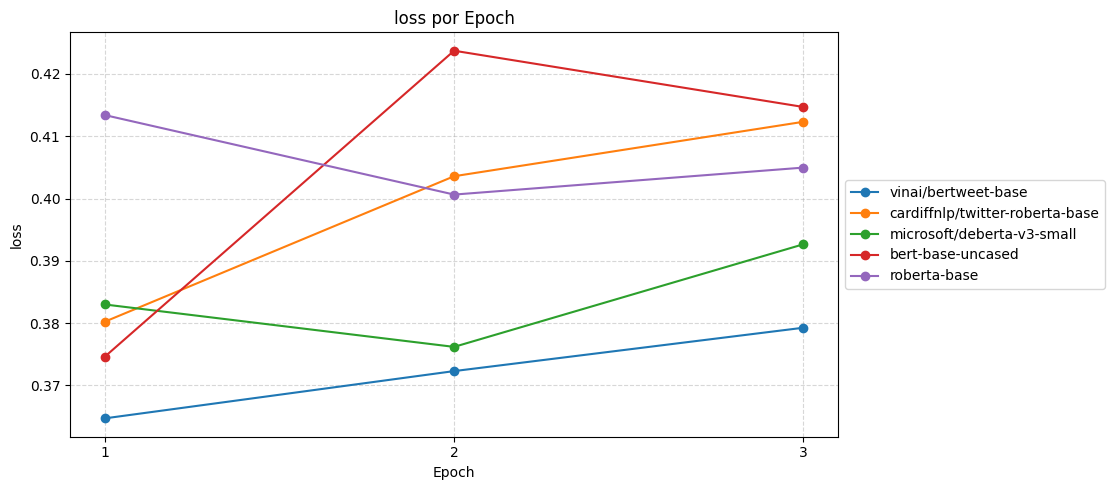

In [30]:

epochs = [1, 2, 3]
metrics = ["f1", "acc", "loss"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
data=model_metrics
# Generar una figura por métrica
for metric in metrics:
    fig, ax = plt.subplots(figsize=(15, 5))
    for i, (model, values) in enumerate(data.items()):
        ax.plot(epochs, values[metric], label=model, color=colors[i], marker='o')

    ax.set_title(f'{metric} por Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.set_xticks(epochs)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Ubicar la leyenda fuera del gráfico, a la derecha
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Ajuste para dejar espacio a la derecha
    plt.show()


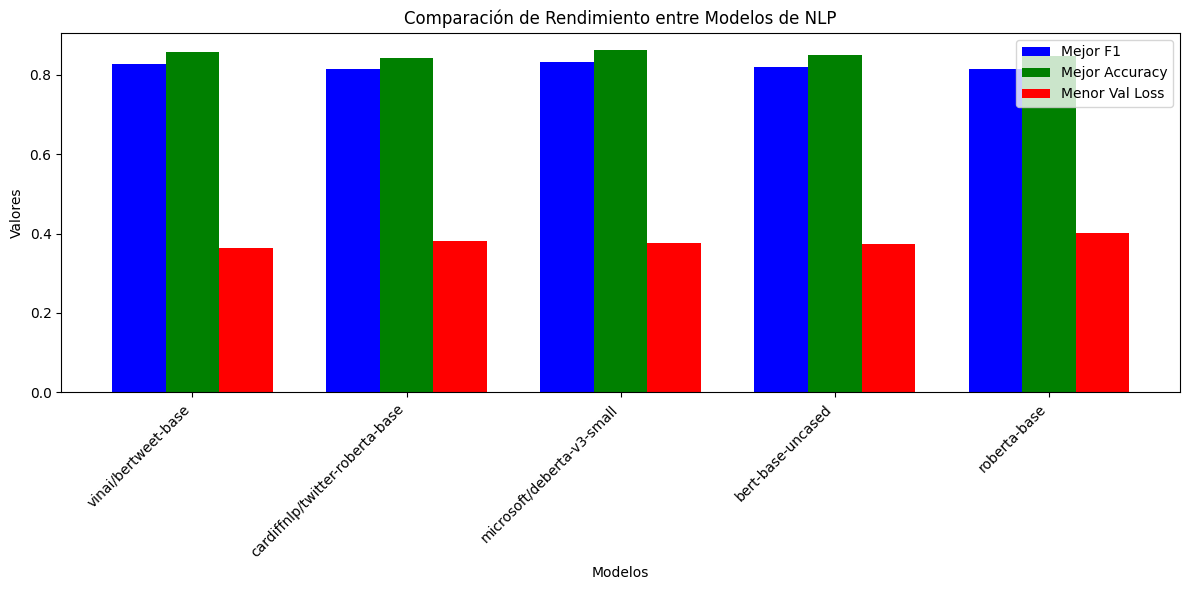

In [25]:


modelos = list(model_metrics.keys())
mejor_f1 = [max(v['f1']) for v in model_metrics.values()]
mejor_acc = [max(v['acc']) for v in model_metrics.values()]
menor_val_loss = [min(v['loss']) for v in model_metrics.values()]

# Posiciones de las barras
x = np.arange(len(modelos))
width = 0.25  # Ancho de las barras

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar cada métrica en diferentes colores
bars1 = ax.bar(x - width, mejor_f1, width, label='Mejor F1', color='blue')
bars2 = ax.bar(x, mejor_acc, width, label='Mejor Accuracy', color='green')
bars3 = ax.bar(x + width, menor_val_loss, width, label='Menor Val Loss', color='red')

# Etiquetas y formato
ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Rendimiento entre Modelos de NLP')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha='right')
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


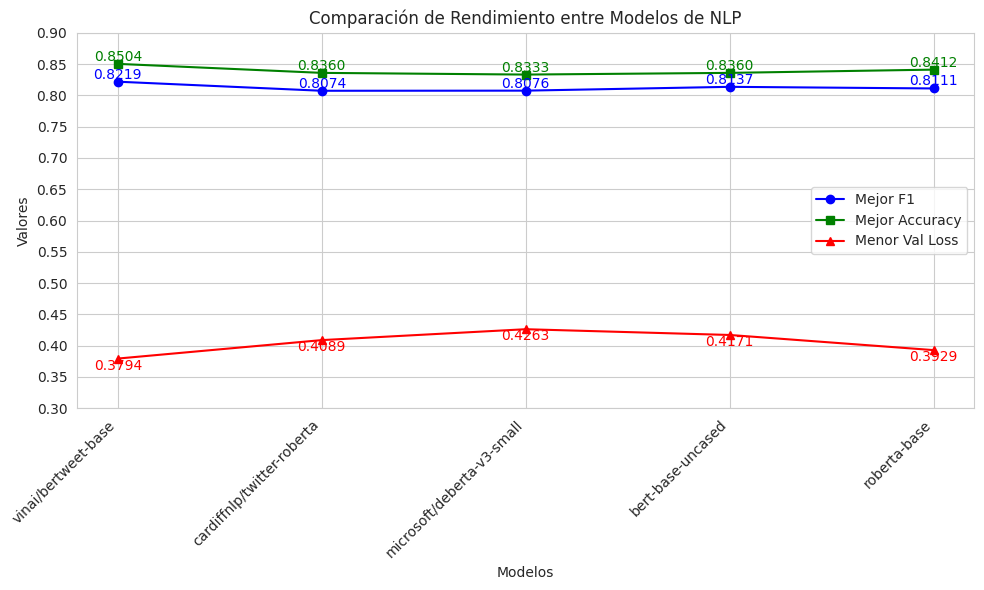

In [ ]:


# Datos de la tabla
modelos = ['vinai/bertweet-base', 'cardiffnlp/twitter-roberta', 'microsoft/deberta-v3-small', 'bert-base-uncased', 'roberta-base']
mejor_f1 = [0.8219, 0.8074, 0.8076, 0.8137, 0.8111]
mejor_acc = [0.8504, 0.8360, 0.8333, 0.8360, 0.8412]
menor_val_loss = [0.3794, 0.4089, 0.4263, 0.4171, 0.3929]

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar líneas con marcadores
plt.plot(modelos, mejor_f1, marker='o', linestyle='-', color='blue', label='Mejor F1')
plt.plot(modelos, mejor_acc, marker='s', linestyle='-', color='green', label='Mejor Accuracy')
plt.plot(modelos, menor_val_loss, marker='^', linestyle='-', color='red', label='Menor Val Loss')

# Agregar los valores en la gráfica
for i, modelo in enumerate(modelos):
    plt.text(modelo, mejor_f1[i], f'{mejor_f1[i]:.4f}', ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(modelo, mejor_acc[i], f'{mejor_acc[i]:.4f}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(modelo, menor_val_loss[i], f'{menor_val_loss[i]:.4f}', ha='center', va='top', fontsize=10, color='red')

# Ajustar escala del eje Y para que inicie en 0.30
plt.ylim(0.30, 0.90)
plt.yticks([0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90])

# Etiquetas y formato
plt.xlabel('Modelos')
plt.ylabel('Valores')
plt.title('Comparación de Rendimiento entre Modelos de NLP')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()
